In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df_house_data = pd.read_csv("/Users/Durga/Desktop/DAT12/project 2/dsc-phase-2-project-main/data/kc_house_data.csv")

In [4]:
df_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
#remove unwanted columns
columns_to_remove = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_house_data_cleaned = df_house_data.drop(columns=columns_to_remove)


In [7]:
df_house_data_cleaned.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [8]:
#filling the missing value
df_house_data_cleaned['waterfront'].fillna(0, inplace=True)
# Using the round() function to round the float values before converting to integers
df_house_data_cleaned['bathrooms'] = df_house_data_cleaned['bathrooms'].round().astype(int)
df_house_data_cleaned['floors'] = df_house_data_cleaned['floors'].astype(int)

In [9]:
df_house_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  int64  
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  int64  
 7   waterfront   21597 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.8 MB


In [10]:
df_house_data_cleaned.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1,1180,5650,1,0.0,3,7,1955
1,6414100192,538000.0,3,2,2570,7242,2,0.0,3,7,1951
2,5631500400,180000.0,2,1,770,10000,1,0.0,3,6,1933
3,2487200875,604000.0,4,3,1960,5000,1,0.0,5,7,1965
4,1954400510,510000.0,3,2,1680,8080,1,0.0,3,8,1987


In [11]:
print(df_house_data_cleaned.isnull().sum())

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64


In [12]:
#Regression Modelling
Lets define the target variable Price and select the features for your regression analysis, follow these steps:
1.Target Variable (Dependent Variable):
The 'price' column, as it represents the sale price of the house.
2. Features (Independent Variables):
Selecting the columns in the dataset that can have impact on the target variable (house price).
These features should be potential predictors of house prices. Based on the provided dataset, some common features to consider include:
'bedrooms': Number of bedrooms in the house.
'bathrooms': Number of bathrooms in the house.
'sqft_living': Square footage of the home's living space.
'sqft_lot': Square footage of the lot.
'floors': Total number of floors (levels) in the house.
'waterfront': Indicator if the house has a view of the waterfront.
'condition': Overall condition of the house.
'grade': Overall grade given to the housing unit.
'yr_built': Year the house was built.



SyntaxError: invalid decimal literal (3111396132.py, line 3)

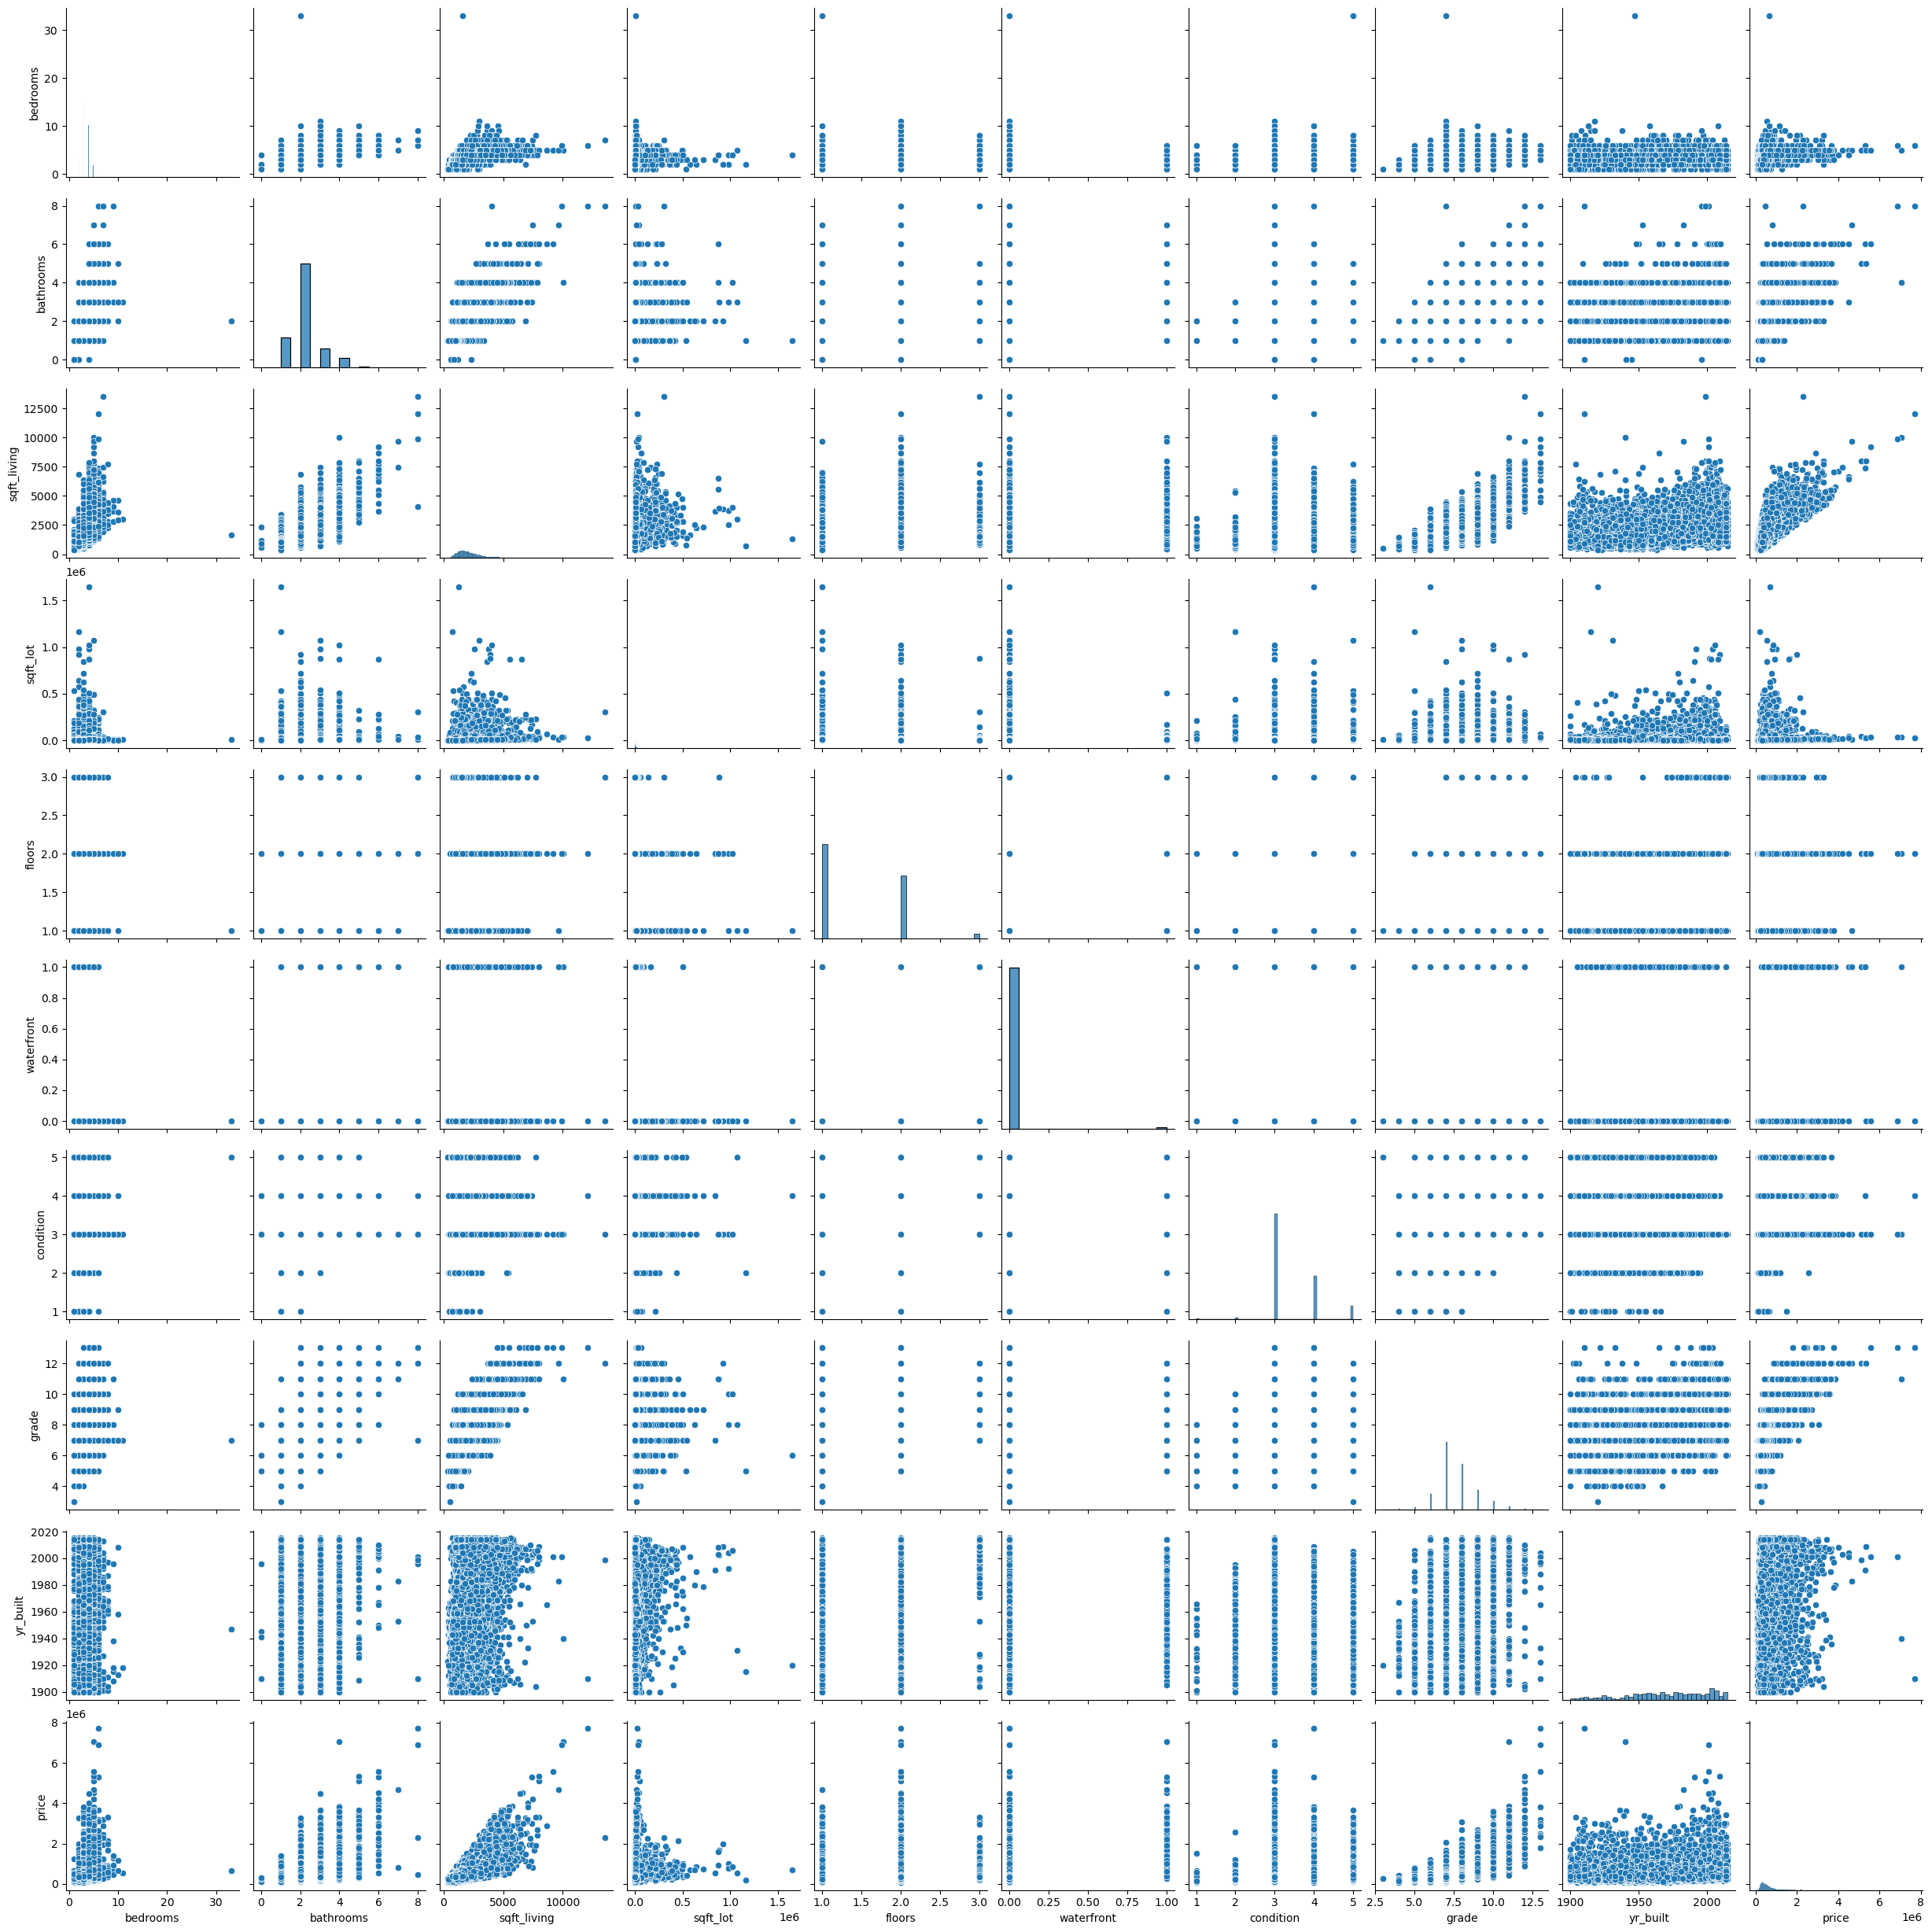

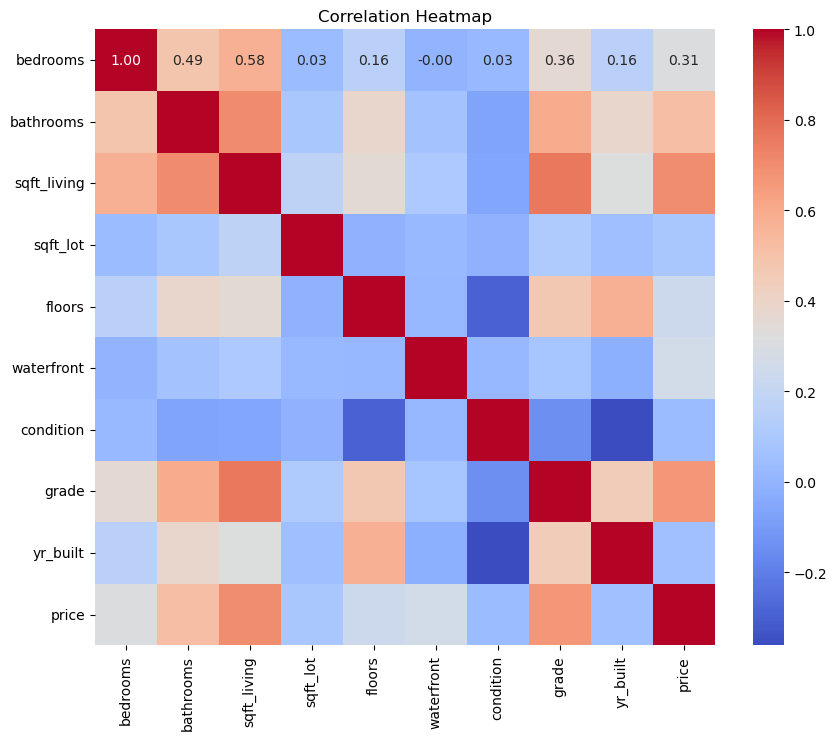

In [13]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Define target variable and features
target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df_house_data_cleaned[features + [target]])
plt.show()

# Correlation heatmap to visualize correlations between variables
correlation_matrix = df_house_data_cleaned[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
* Strong Positive Correlations:
1.Square footage of living space (sqft_living) - This has the darkest red color next to "price," indicating the strongest positive 
correlation. Houses with larger living areas tend to sell for more.
2.Number of bedrooms (bedrooms) - This also has a dark red color next to "price," indicating a strong positive correlation. 
Houses with more bedrooms tend to sell for more.
                                                                                                                                                                 
* Moderate Positive Correlations:
1.Number of bathrooms (bathrooms) - This has a moderate red color next to "price," indicating a moderate positive correlation. 
Houses with more bathrooms tend to sell for more, but the correlation is not quite as strong as the number of bedrooms.
2.Size of the lot (square footage) (sqft_lot) - This has a faint red color next to "price," indicating a weak positive correlation.
There is a slight tendency for houses on larger lots to sell for more.

* Weak Positive Correlations:
1.Number of floors (floors) - This has a very faint red color next to "price," indicating a very weak positive correlation. 
There is almost no relationship between the number of floors in a house and its price.
                                                                                                                                                                                                                                                                                                                                                                                      
* Weak Negative Correlation:
1.Condition of the house (condition) - This has a faint blue color next to "price," indicating a weak negative correlation. 
There is a slight tendency for houses in poorer condition to sell for less money.

In [14]:
#categorical variable

# Convert "bathroom", "bedroom", "grade", and "floor" to categorical variables
df_house_data_cleaned['bathroom_cat'] = df_house_data_cleaned['bathrooms'].astype(str)
df_house_data_cleaned['bedroom_cat'] = df_house_data_cleaned['bedrooms'].astype(str)
df_house_data_cleaned['grade_cat'] = df_house_data_cleaned['grade'].astype(str)
df_house_data_cleaned['floor_cat'] = df_house_data_cleaned['floors'].astype(str)
df_house_data_cleaned['waterfront_cat'] = df_house_data_cleaned['waterfront'].astype(str)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_house_data_cleaned, columns=['bathroom_cat', 'bedroom_cat', 'grade_cat', 'floor_cat','waterfront_cat'], prefix=['bathrooms', 'bedrooms', 'grade', 'floors','waterfront'])

# Select features and target variable
features = df_encoded.columns.drop(['price'])
X = df_encoded[features]
y = df_encoded['price']

# Proceed with analysis or modeling using X and y

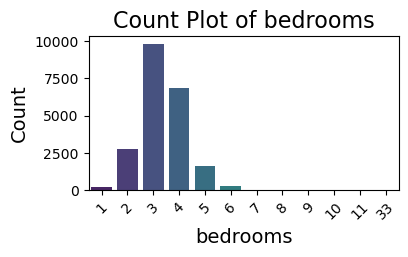

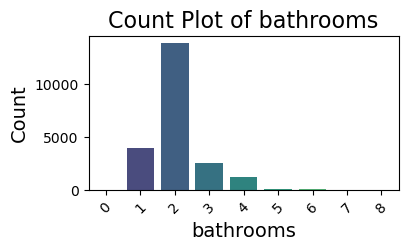

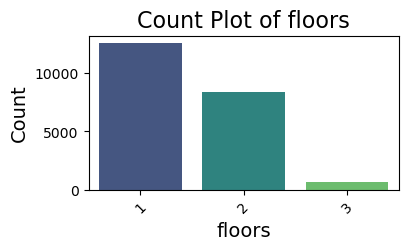

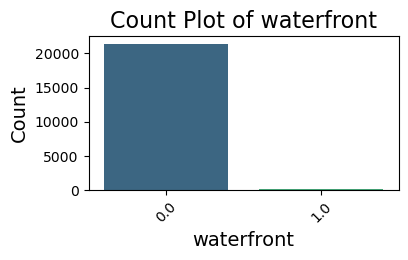

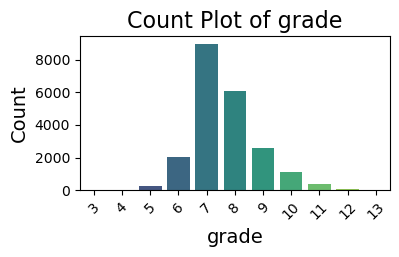

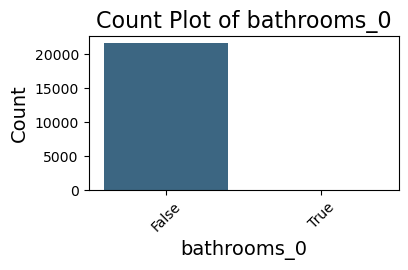

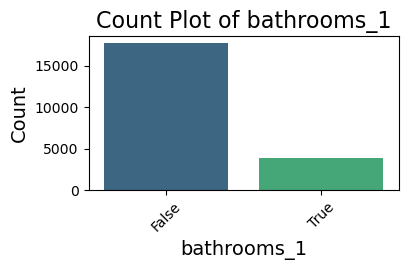

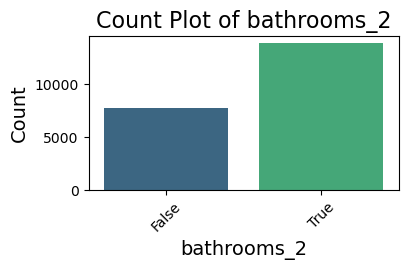

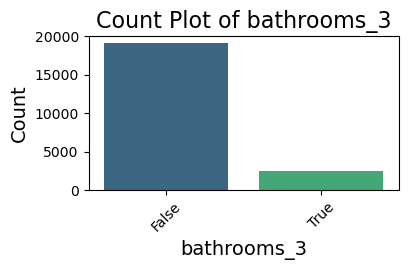

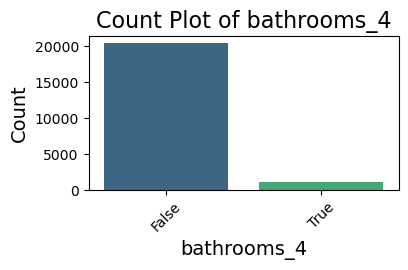

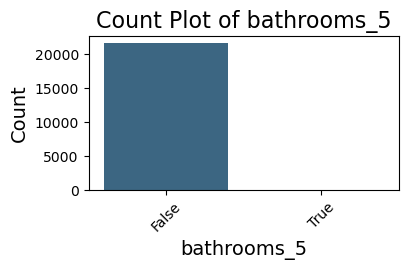

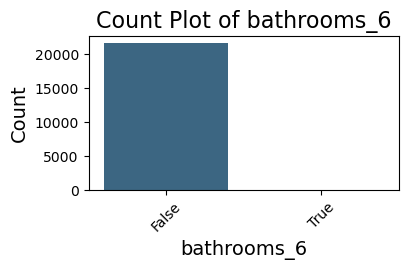

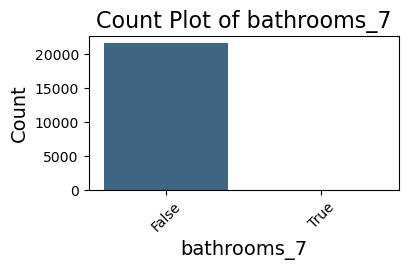

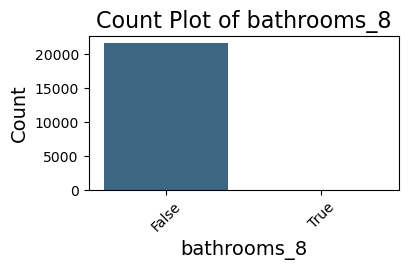

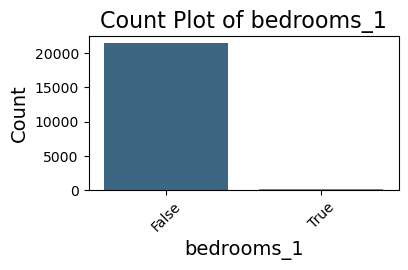

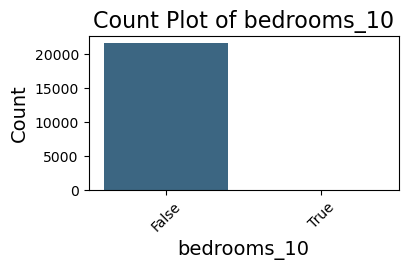

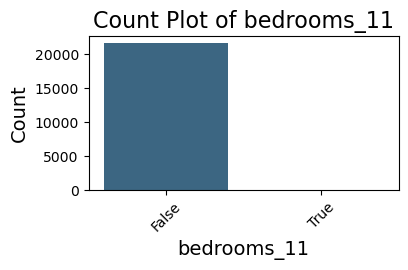

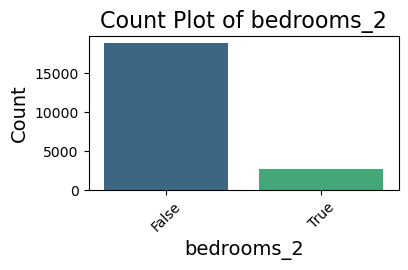

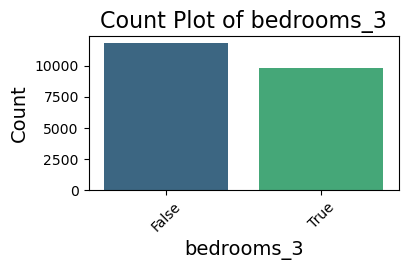

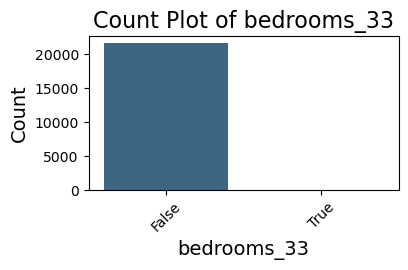

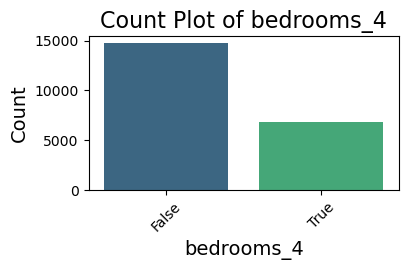

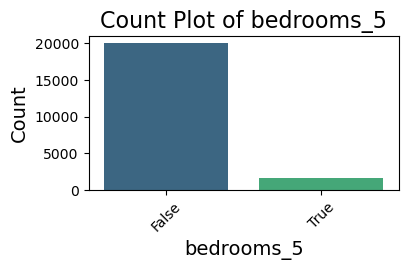

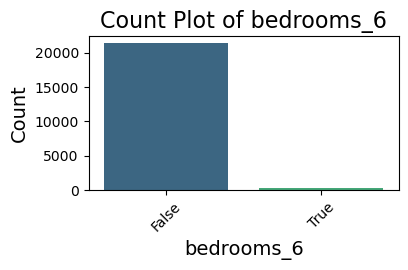

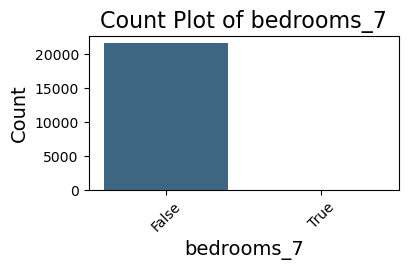

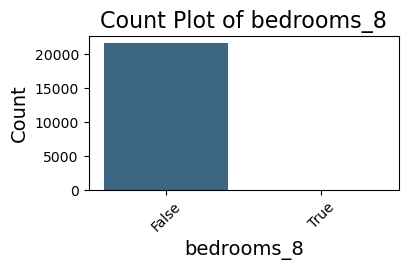

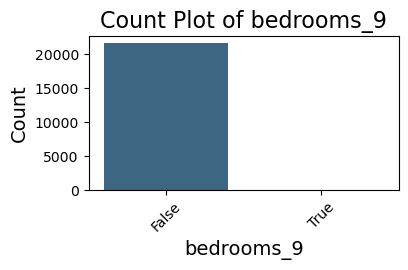

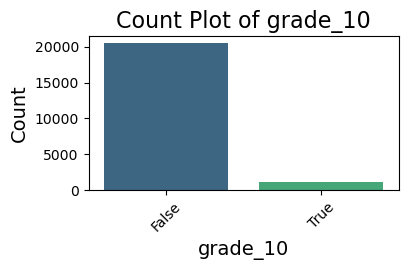

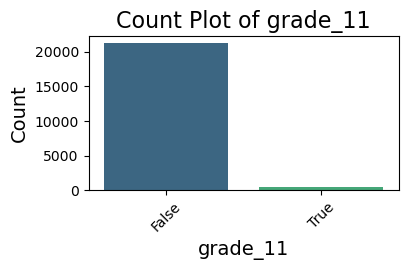

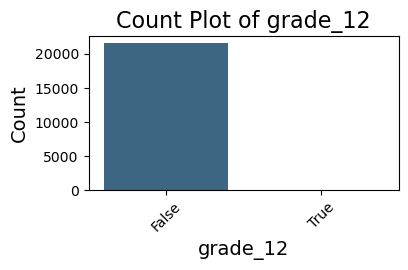

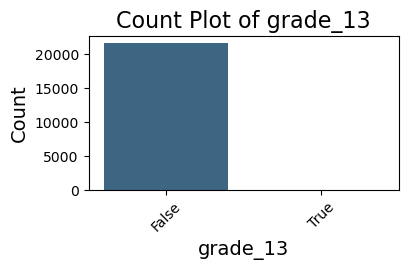

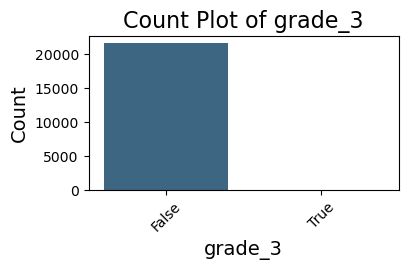

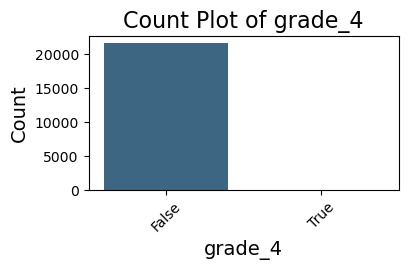

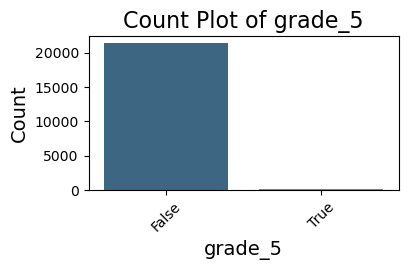

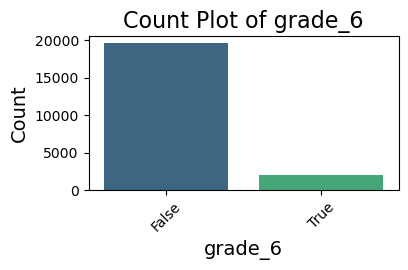

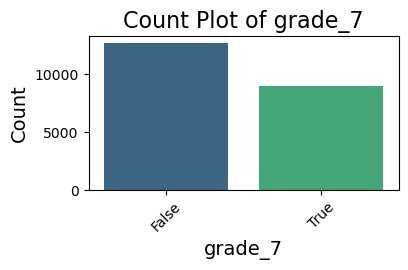

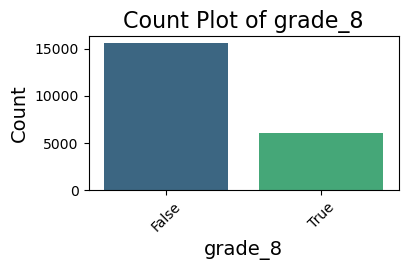

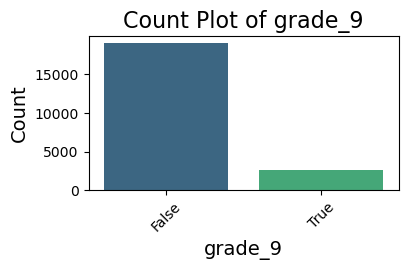

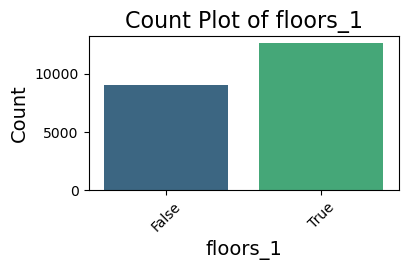

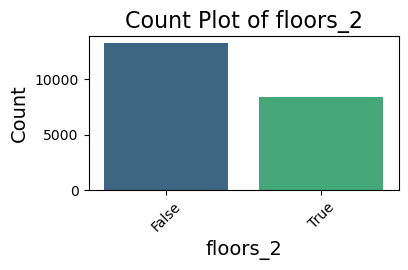

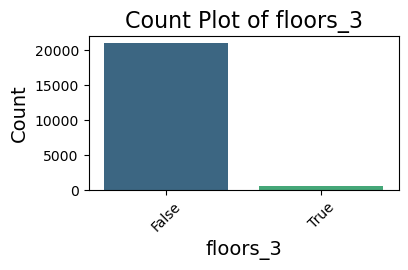

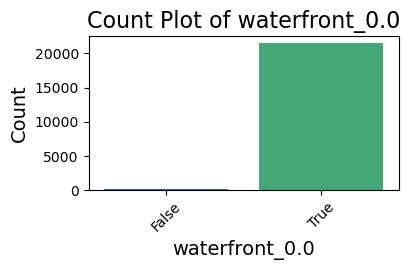

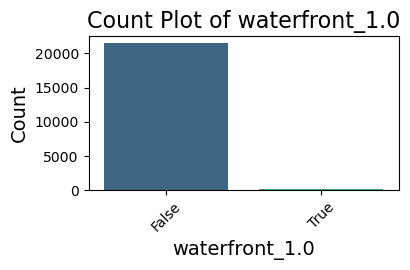

In [15]:
# Selecting the one-hot encoded categorical columns
categorical_columns_encoded = [col for col in df_encoded.columns if any(prefix in col for prefix in ['bathrooms', 'bedrooms', 'grade', 'floors','waterfront'])]

# Looping through each one-hot encoded categorical column and creating count plots
for column in categorical_columns_encoded:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df_encoded, x=column, palette='viridis')
    plt.title(f'Count Plot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
1.Train-Test Split: The data is split into training and testing sets using the train_test_split() function from scikit-learn. 
This allows for evaluating the model's performance on unseen data.
2.Linear Regression Model: A linear regression model is initialized using scikit-learn's LinearRegression() class.
3.Model Fitting: The model is trained on the training data using the fit() method.
4.Prediction: Predictions are made on the testing data using the predict() method.
5.Model Evaluation: The mean squared error (MSE), root mean squared error (RMSE), and R-squared values are calculated to assess 
the model's performance on the testing data.
6.Visualization: A scatter plot is created to visualize the relationship between the predicted and actual prices.
7.Interpretation: The coefficients of the features are printed to understand their influence on the predicted prices.

Testing Data Evaluation:
Mean Squared Error: 46818154930.56144
Root Mean Squared Error: 216375.03305733184
R-squared: 0.6404585134071707


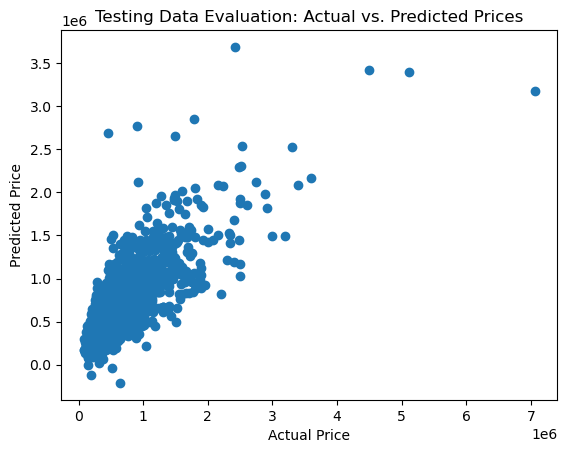

id : -9.837660614639939e-07
bedrooms : -23546.03033929739
bathrooms : 183220.63738387794
sqft_living : 144.46417722036486
sqft_lot : -0.31956307974336123
floors : 45354.29915036237
waterfront : 238786.42290774436
condition : 27516.391311902637
grade : 183447.76249234437
yr_built : -3294.1481413579445
bathrooms_0 : 244977.28783510753
bathrooms_1 : 151954.358568423
bathrooms_2 : -14102.904691537966
bathrooms_3 : -148589.84373271363
bathrooms_4 : -266564.6408520257
bathrooms_5 : -145057.63214429133
bathrooms_6 : -79802.25859651073
bathrooms_7 : -718116.9058535559
bathrooms_8 : 975302.5393400717
bedrooms_1 : -15515.715028157387
bedrooms_10 : 21041.477762592633
bedrooms_11 : -97127.92712963324
bedrooms_2 : 12996.703849902815
bedrooms_3 : -4736.473012402731
bedrooms_33 : 1.3498356565833092e-06
bedrooms_4 : -12603.289519368984
bedrooms_5 : 13215.041099489741
bedrooms_6 : 6263.3816753935525
bedrooms_7 : -80125.2409097984
bedrooms_8 : 63504.0522284677
bedrooms_9 : 93087.98901345344
grade_10 : -

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Testing Data Evaluation:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualize the relationship between the predicted and actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Data Evaluation: Actual vs. Predicted Prices")
plt.show()

# Interpretation and analysis (e.g., coefficient values)
coefficients = model.coef_
for feature, coef in zip(features, coefficients):
    print(feature, ':', coef)

Training Data Evaluation:
Mean Squared Error (MSE): 42356838072.36605
Root Mean Squared Error (RMSE): 205807.76970844917
R-squared (R²): 0.688850179048549


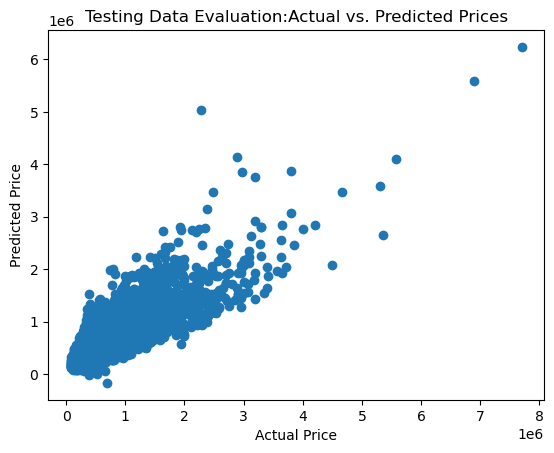

In [17]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate MSE, RMSE, and R-squared for the training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training Data Evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)

# Visualize the relationship between the predicted and actual prices
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Data Evaluation:Actual vs. Predicted Prices")
plt.show()

In [ ]:
Interpretation:

The model performs slightly better on the training data compared to the testing data, as indicated by lower MSE and RMSE values and 
a higher R² value on the training data.
The R² values indicate that the model explains approximately 68.89% of the variability in house prices in the training data and 
approximately 64.05% of the variability in the testing data.
Overall, the model provides a moderate level of explanatory power and performs reasonably well in predicting house prices, but there
may still be room for improvement.

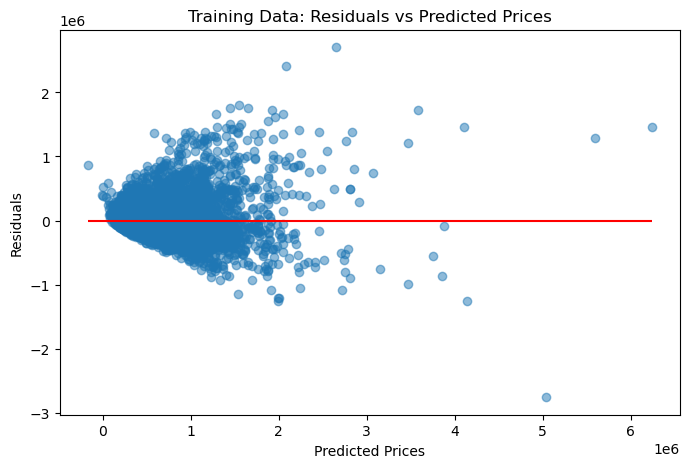

train_residuals


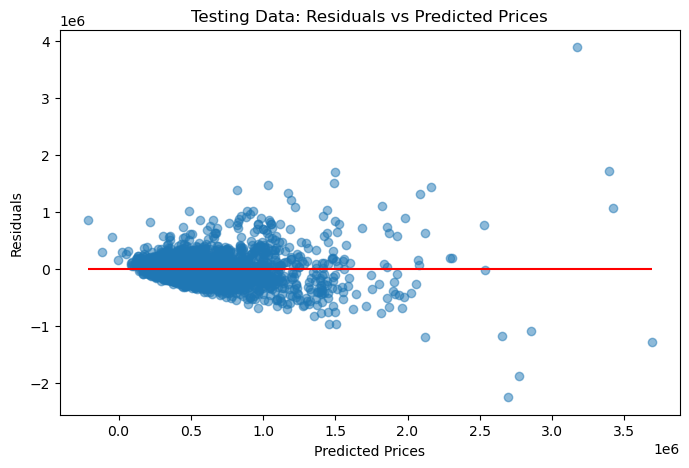

test_residuals


In [26]:
# Plotting residuals for training data
train_residuals = y_train - y_train_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='red')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Training Data: Residuals vs Predicted Prices")
plt.show()


# Plotting residuals for testing data
test_residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, test_residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Testing Data: Residuals vs Predicted Prices")
plt.show()


In [27]:
# Calculate mean and standard deviation of training residuals
train_residuals_mean = train_residuals.mean()
train_residuals_std = train_residuals.std()

# Print training residuals statistics
print("Training Residuals:")
print("Mean:", train_residuals_mean)
print("Standard Deviation:", train_residuals_std)

# Calculate mean and standard deviation of testing residuals
test_residuals_mean = test_residuals.mean()
test_residuals_std = test_residuals.std()

# Print testing residuals statistics
print("\nTesting Residuals:")
print("Mean:", test_residuals_mean)
print("Standard Deviation:", test_residuals_std)

Training Residuals:
Mean: -3.080690232058494e-10
Standard Deviation: 205813.72608699603

Testing Residuals:
Mean: -4915.227231764881
Standard Deviation: 216344.23940376262


In [ ]:
The mean residuals being close to zero indicates that, on average, the model is performing well in predicting the prices. 
However, the standard deviation indicates the variability or dispersion of the residuals around the mean.


In [28]:

From the regression modeling results, we can infer several insights relevant to advising homeowners on how home renovations might impact 
the estimated value of their homes:

1.Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): While the RMSE values are relatively high, they still provide an 
estimate of the average prediction error.
2.R-squared (R²) Value:he R-squared values for both training and testing data are moderate, suggesting that the model explains a
significant portion of the variability in home prices, but there is still room for improvement.
3.Residual Analysis::The mean residuals being close to zero for the training data indicate that, on average, the model predictions
are unbiased. However, the mean residual for the testing data being non-zero suggests a potential bias in predictions.
The standard deviation of residuals indicates the variability or dispersion of prediction errors. While the standard deviation is 
relatively high, it reflects the variability in home prices that the model struggles to capture accurately.
                                        

SyntaxError: invalid syntax (3516123197.py, line 1)